In [2]:
import PollingSystem as PS
import MarkovianRP as MRP
import StaticRP as SRP
import numpy as np

from matplotlib import pyplot as plt
from importlib import reload 

[0.18110531 0.4366604  0.38223429] 476.42530086445845
[0.23441238 0.38279381 0.38279381] 483.8092136704341
[0.20623583 0.42183186 0.37193231] 504.3405920737707
[0.25585663 0.37207168 0.37207168] 510.08504911874917
[0.24566243 0.39909143 0.35524614] 540.0309089687529
[0.2858139  0.35709305 0.35709305] 543.3699009101764
[0.26476873 0.38825006 0.34698122] 553.040332470206
[0.29890426 0.35054787 0.35054787] 555.4098844502472
[0.28150286 0.37883891 0.33965823] 561.7854575908598
[0.30968258 0.34515871 0.34515871] 563.4540468331778
[0.29635092 0.37053623 0.33311285] 567.3096803655152
[0.31876309 0.34061845 0.34061845] 568.4855602213386
[0.30969205 0.36312364 0.32718431] 570.3586456280444
[0.32655257 0.33672372 0.33672372] 571.202037271526
[0.32178481 0.35643042 0.32178477] 571.482726226763
[0.33333333 0.33333333 0.33333333] 572.1163754480294
[0.33282447 0.35034817 0.31682736] 571.0978668368526
[0.33930861 0.33034569 0.33034569] 571.615515431945
[0.34296704 0.34478239 0.31225058] 569.524105561

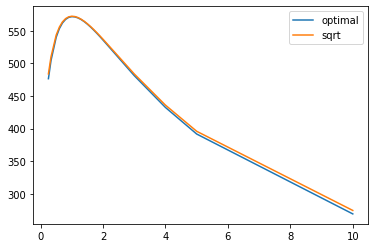

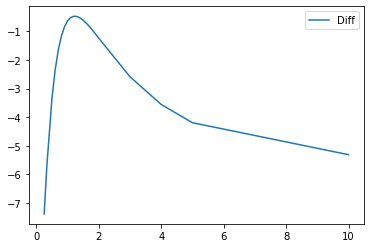

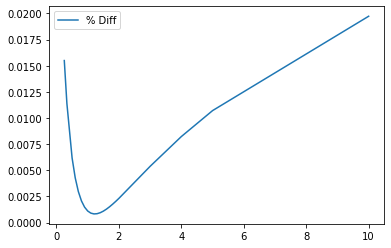

In [71]:
#vary along single axis, different lambda, same switching times
reload(PS)
beta = 1/16
base = beta*0.3
els = base*np.ones(3)
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
sys_traffic = 0.9
S = np.array([[ 0, 10, 11],
               [10, 0, 10],
               [11, 10, 0]])
S = S*4
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
scales = np.array([0.25, 1/3,0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2,3,4, 5, 10])
for scale in scales:
    ps.Ls = base*np.ones(3)
    ps.Ls[0] = base*scale
    ps.Ls = (ps.Ls/np.sum(ps.Ls))*sys_traffic/beta#normalize system traffic
    argmin, valmin = ps.calc_optimal_rp(S)
    print(argmin, valmin)
    opt_ws.append(valmin)
    pi = ps._opt_pi_equal_distances()
    rp = MRP.RandomRP(pi)
    wait = ps.calc_avg_wait(S,rp)
    print(pi, wait)
    sqrt_ws.append(wait)
    
    
plt.plot(scales, opt_ws, label="optimal")
plt.plot(scales, sqrt_ws, label="sqrt")
plt.legend()
plt.show()


plt.plot(scales, (np.array(opt_ws) - np.array(sqrt_ws)) , label="Diff")
plt.legend()
plt.show()

plt.plot(scales, (np.array(sqrt_ws)- np.array(opt_ws))/np.array(opt_ws) , label="% Diff")
plt.legend()
plt.show()

In [63]:
#vary along two axes, different lambda, same switching times
reload(PS)
beta = 1/16
base = beta*0.1
els = base*np.ones(3)

ps = PS.PollingSystem(els, beta)
sys_traffic = 0.3
S = np.array([[ 0, 10, 10],
               [10, 0, 10],
               [10, 10, 0]])
S = S*4
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
scales = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
ns = len(scales)
opt_ws = np.zeros((ns, ns))
sqrt_ws = np.zeros((ns, ns))

for i in range(ns):
    for j in range(ns):
        ps.Ls = base*np.ones(3)
        ps.Ls[0] = base*scales[i]
        ps.Ls[1] = base*scales[j]
        ps.Ls = (ps.Ls/np.sum(ps.Ls))*sys_traffic/beta#normalize system traffic
        argmin, valmin = ps.calc_optimal_rp(S)
        opt_ws[i,j] = valmin
        
        pi = ps._opt_pi_equal_distances()
        rp = MRP.RandomRP(pi)
        wait = ps.calc_avg_wait(S,rp)
        sqrt_ws[i,j] = wait


/home/win/.local/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


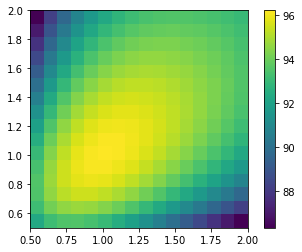

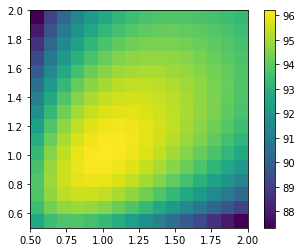

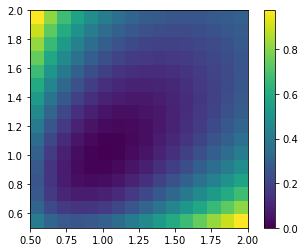

In [67]:
ws = plt.imshow(opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws-opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()


In [74]:
#vary along two axes, different lambda, different (but still symmetric) switching times
reload(PS)
beta = 1/16
base = beta*0.2
els = base*np.ones(3)
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
sys_traffic = 0.9
S = np.array([[ 0, 5, 10],
               [5, 0, 15],
               [10, 15, 0]])
S = S*1
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
scales = np.array([0.5, 0.6, 0.7, 0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
ns = len(scales)
opt_ws = np.zeros((ns, ns))
sqrt_ws = np.zeros((ns, ns))

for i in range(ns):
    for j in range(ns):
        ps.Ls = base*np.ones(3)
        ps.Ls[0] = base*scales[i]
        ps.Ls[1] = base*scales[j]
        ps.Ls = (ps.Ls/np.sum(ps.Ls))*sys_traffic/beta#normalize system traffic
        argmin, valmin = ps.calc_optimal_rp(S)
        opt_ws[i,j] = valmin
        
        pi = ps._opt_pi_equal_distances()
        rp = MRP.RandomRP(pi)
        wait = ps.calc_avg_wait(S,rp)
        sqrt_ws[i,j] = wait


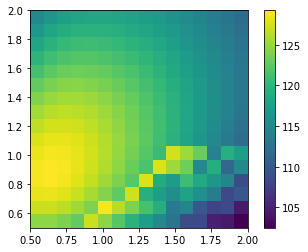

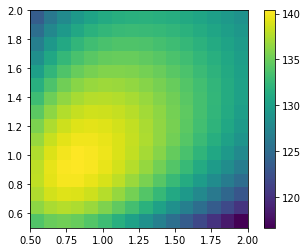

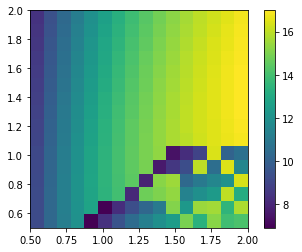

In [75]:
ext = [0.5,2,0.5,2]
ws = plt.imshow(opt_ws.T, extent=ext, origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws.T, extent=ext, origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow((sqrt_ws-opt_ws).T, extent=ext, origin='lower')
plt.colorbar(ws)
plt.show()
